# Code by Dharanija Bantu

In [887]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [888]:
# To display all columns
pd.set_option('display.max_columns', None)

In [889]:
# To create a DataFrame from CSV file
df = pd.read_csv('Training set values.csv', index_col=0)
print(df.shape)
df.head(3)

(59400, 40)


,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,functional,6000.0,14-03-2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,functional,0.0,06-03-2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,functional,25.0,25-02-2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe


## Exploratory Data Analysis

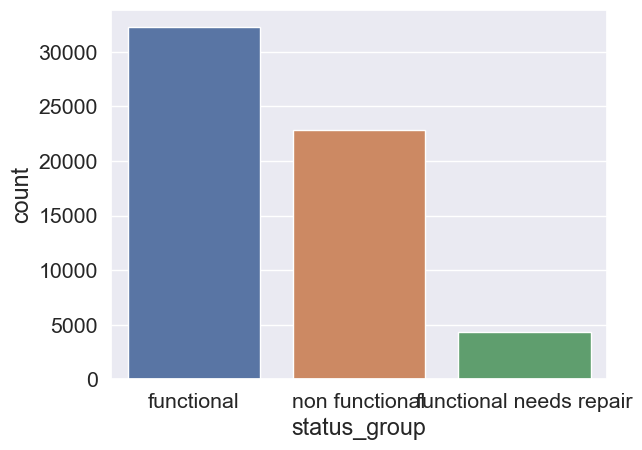

In [890]:
# checking the distribution status group
sns.countplot(data = df, x = 'status_group')

In [891]:
# Summarizing the statistics 
# The min and max are different than the 25th and 75th percentiles in amount_tsh, longitude, num_private, region_code, district_code, population
df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [892]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  object 
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15

In [893]:
# Printing the count of unique values for categorical columns
categorical_cols = df.select_dtypes(include='object').columns
unique_counts = {}

for col in categorical_cols:
    unique_counts[col] = df[col].nunique()
for col, count in unique_counts.items():
    print(f"{col}: {count}")

status_group: 3
date_recorded: 356
funder: 1897
installer: 2145
wpt_name: 37400
basin: 9
subvillage: 19287
region: 21
lga: 125
ward: 2092
public_meeting: 2
recorded_by: 1
scheme_management: 12
scheme_name: 2696
permit: 2
extraction_type: 18
extraction_type_group: 13
extraction_type_class: 7
management: 12
management_group: 5
payment: 7
payment_type: 7
water_quality: 8
quality_group: 6
quantity: 5
quantity_group: 5
source: 10
source_type: 7
source_class: 3
waterpoint_type: 7
waterpoint_type_group: 6


In [894]:
# Printing the unique values in categorical column
categorical_cols = df.select_dtypes(include='object').columns
unique_val = {}

for col in categorical_cols:
    unique_val[col] = df[col].unique()
for col, val in unique_val.items():
    print(f"{col}: {val}")

status_group: ['functional' 'non functional' 'functional needs repair']
date_recorded: ['14-03-2011' '06-03-2013' '25-02-2013' '28-01-2013' '13-07-2011'
 '13-03-2011' '01-10-2012' '09-10-2012' '03-11-2012' '03-08-2011'
 '20-02-2011' '18-02-2013' '14-10-2012' '15-03-2013' '20-10-2012'
 '04-08-2011' '04-07-2011' '04-09-2011' '22-07-2011' '22-02-2011'
 '27-02-2011' '10-02-2013' '04-10-2011' '03-11-2013' '21-01-2013'
 '16-01-2013' '11-07-2011' '05-03-2013' '16-03-2013' '23-03-2011'
 '16-03-2011' '19-03-2013' '11-03-2011' '23-02-2011' '28-03-2013'
 '16-07-2011' '27-03-2011' '11-02-2013' '03-10-2013' '12-03-2011'
 '07-07-2011' '15-01-2013' '18-03-2013' '22-10-2012' '05-02-2013'
 '27-07-2011' '04-04-2011' '21-02-2013' '18-08-2011' '31-07-2011'
 '01-08-2011' '14-07-2011' '22-02-2013' '03-07-2013' '03-08-2013'
 '22-01-2013' '22-03-2011' '03-05-2013' '19-01-2013' '09-02-2013'
 '04-01-2011' '04-02-2013' '05-03-2011' '31-03-2011' '27-02-2013'
 '07-08-2011' '30-03-2011' '23-10-2012' '02-03-2011' '0

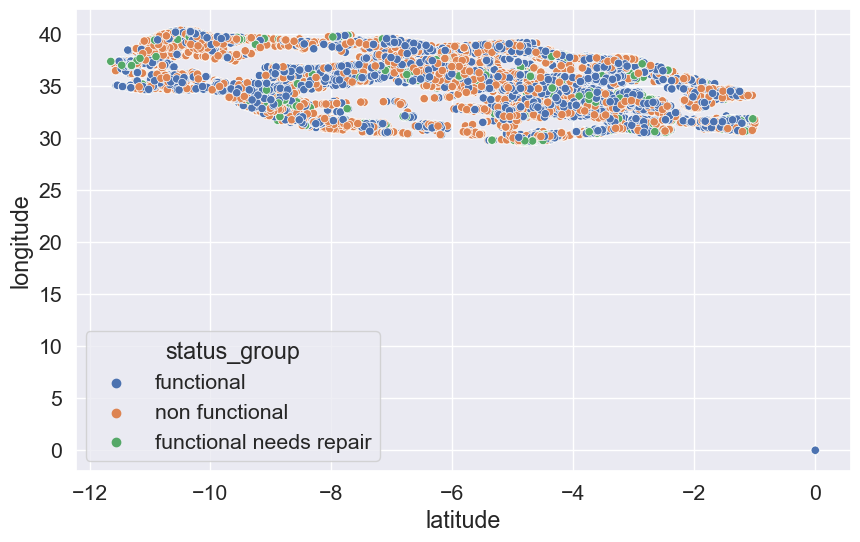

In [895]:
fig, ax  = plt.subplots(figsize=(10,6))
sns.scatterplot(data = df, x = 'latitude', y = 'longitude',hue="status_group", ax=ax)

#Observations:
         # The number of the functionality status of the water pumps is evenly distributed in Tanzania.
         # The South Eastern and western part of Tanzania has a lot of non-functional pumps
         # We cans see the outliers at longitude =0

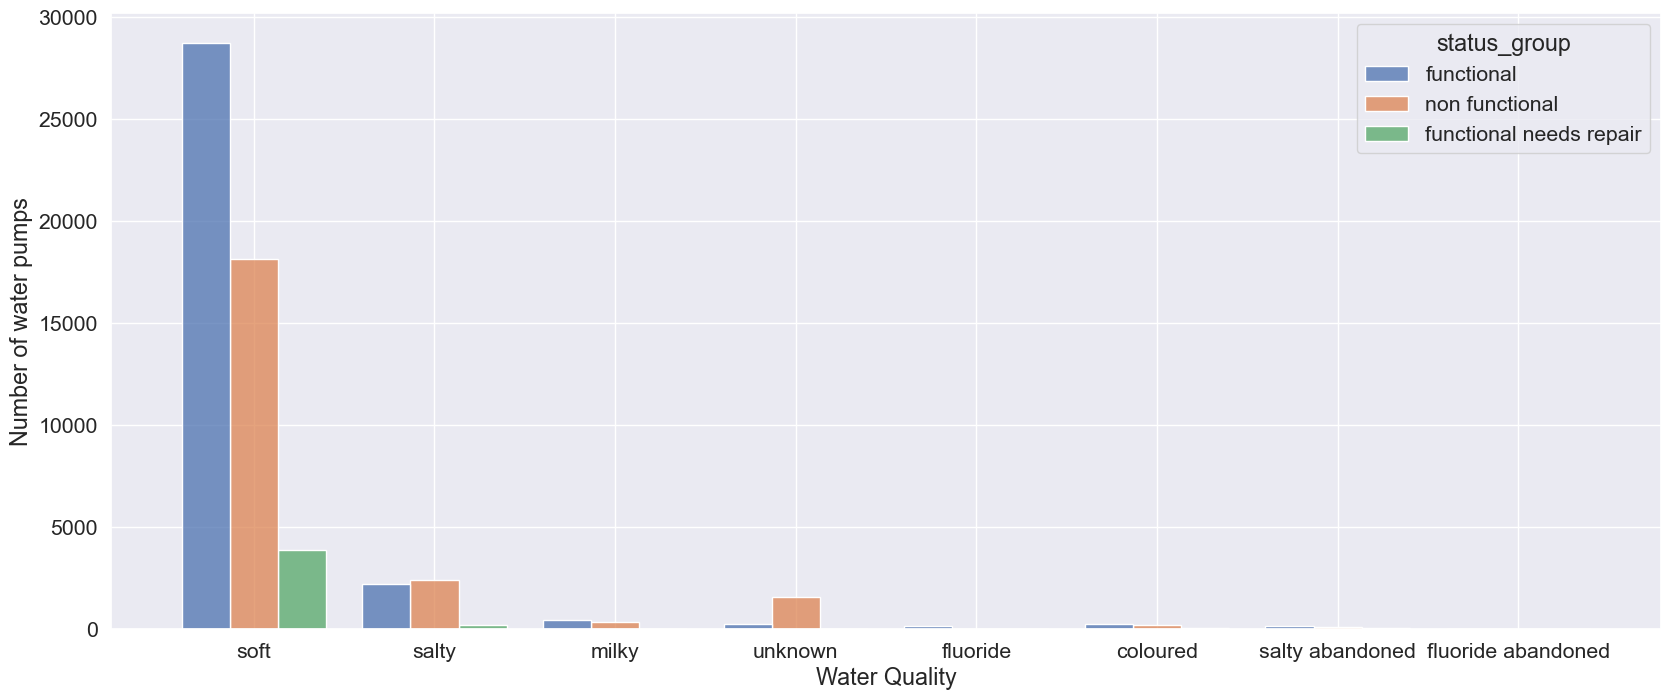

In [896]:
fig, ax  = plt.subplots(figsize=(20,8))
sns.histplot(data=df, x="water_quality", hue="status_group", multiple="dodge", shrink=.8, ax=ax)
ax.set_xlabel("Water Quality")
ax.set_ylabel("Number of water pumps");

#Observations
    # The water quality in majority of the water pumps is soft. 
    # The functional water pumps in the soft water are more than the non-functional.
    # The non functional water pumps in the salty water is slightly more than the functional water pumps.
    # In all the different types of water quality, the pumps that are functional but need repair are minimal. 

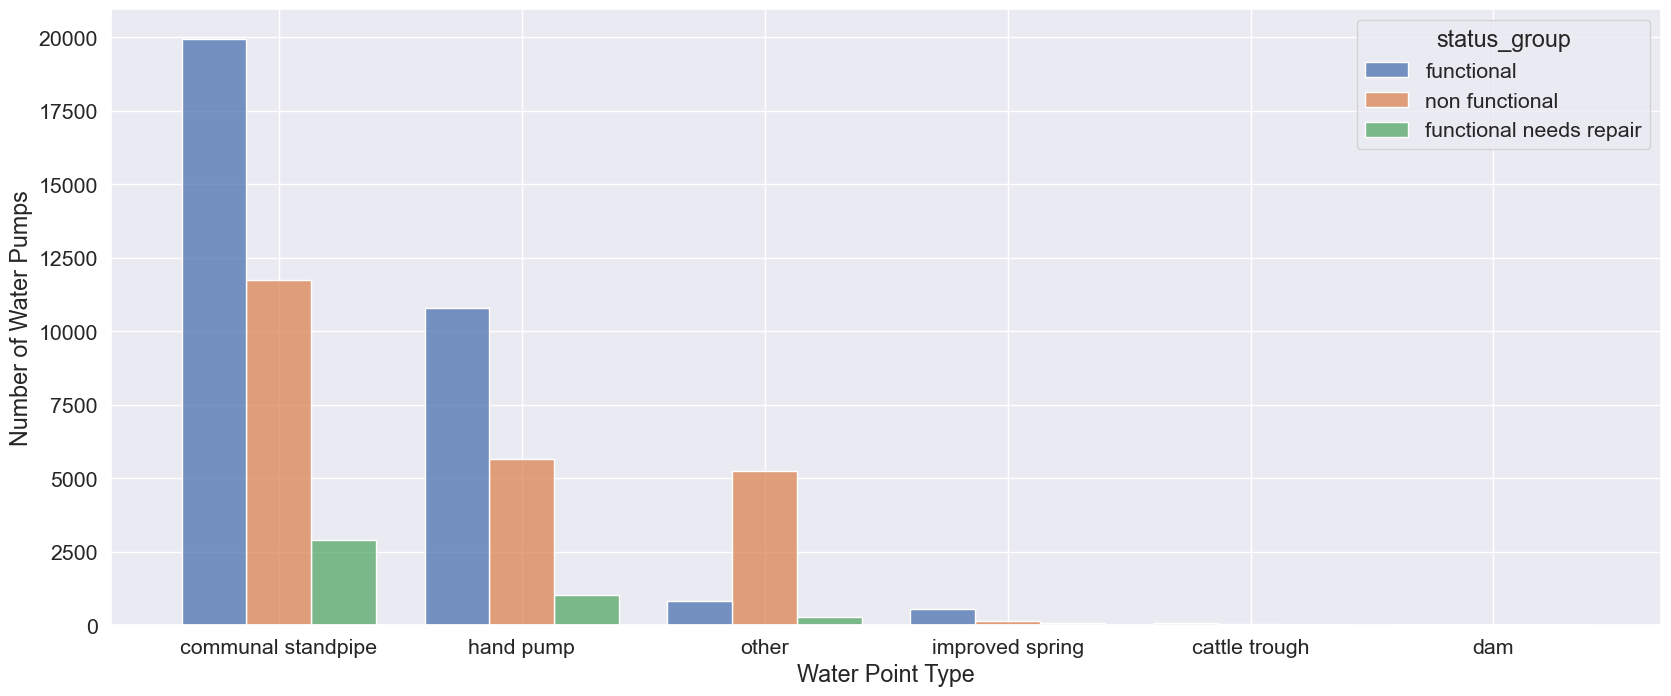

In [897]:
fig, ax  = plt.subplots(figsize=(20,8))
sns.histplot(data=df, x="waterpoint_type_group", hue="status_group", multiple="dodge", shrink=.8, ax=ax)
ax.set_xlabel('Water Point Type')
ax.set_ylabel('Number of Water Pumps');

# Observations:
    # communal standpipe is the most common type of water point
    # The type of water point referenced by 'other' has more non-functional water pumps than functional ones.

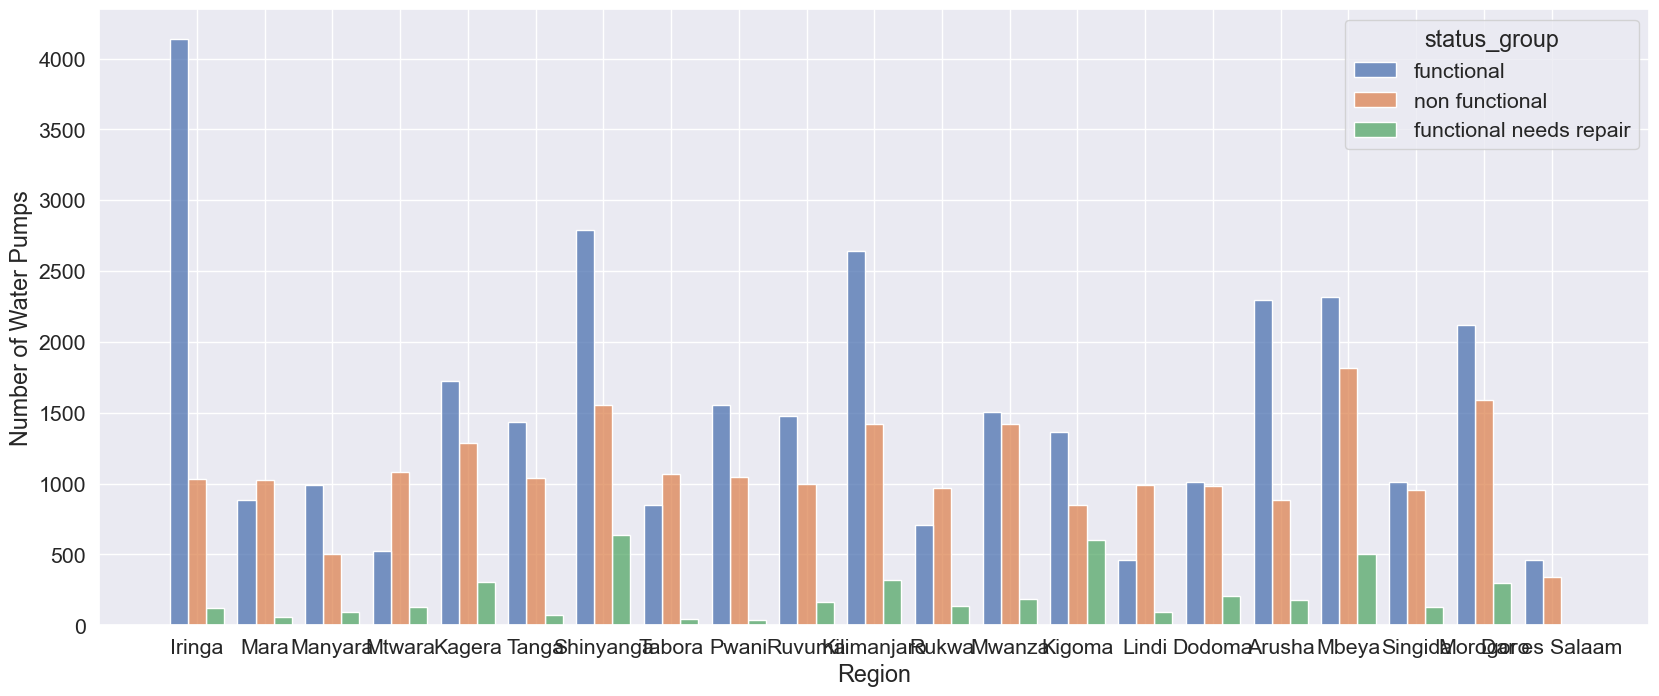

In [898]:
fig, ax  = plt.subplots(figsize=(20,8))
sns.histplot(data=df, x="region", hue="status_group", multiple="dodge", shrink=.8, ax=ax)
ax.set_xlabel('Region')
ax.set_ylabel('Number of Water Pumps');

# Observations:
    # More number of non functional water pumps are in Mara, Mtawara,Tabora,Ruka,Lindi
    # More number of functional but needs repair are in Shinyanga, Kigoma, and Mbeya

### Checking categorical features

In [899]:
check = pd.DataFrame(df.wpt_name.value_counts())
check[check['wpt_name'] == 1]

,wpt_name
Kwa Lutema,1
Ngayi,1
Ofisi Ya Maliasili,1
Kinankoli,1
Kwamapembe,1
...,...
Anglican Mkasenga,1
Mumirama,1
Kwa Nathorilemi,1
Kwa Mzee Hanji,1


In [900]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [901]:
df['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [902]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [903]:
df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [904]:
df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [905]:
df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [906]:
df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [907]:
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [908]:
df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [909]:
df['num_private'].value_counts()

0      58643
6         81
1         73
8         46
5         46
       ...  
42         1
136        1
35         1
131        1
94         1
Name: num_private, Length: 65, dtype: int64

In [910]:
df['lga'].value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [911]:
df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

## Preprocessing 

#### Dropping Duplicates

In [912]:
# Dropping duplicates
print(len(df[df.duplicated(keep='first')]))
df.drop_duplicates(inplace = True, keep = 'first')

36


#### Dropping redundant data

In [913]:
# Dropping redundant columns - region , district_code, 'extraction_type_group','extraction_type_class','quality_group','payment_type', 'quantity_group', 'source_type',scheme_name','management_group','waterpoint_type_group'
# Dropping wpt_name as it has 37400 unique values
# Dropping num_private as there are 58607 zero values
# Dropping subvillage as there are 19287 unique values
# Dropping recorded_by as there is only one unique value
# Dropping 'lga','ward'as already geographic location region code is considered
df.drop(labels = [ 'wpt_name', 'num_private', 'subvillage', 'region' , 'lga','ward','district_code', 'recorded_by', 'scheme_name', 'extraction_type_group','extraction_type_class','quality_group','payment_type', 'quantity_group', 'source_type','management_group','waterpoint_type_group'],inplace = True, axis = 1)

#### Dealing with outliers and bad data

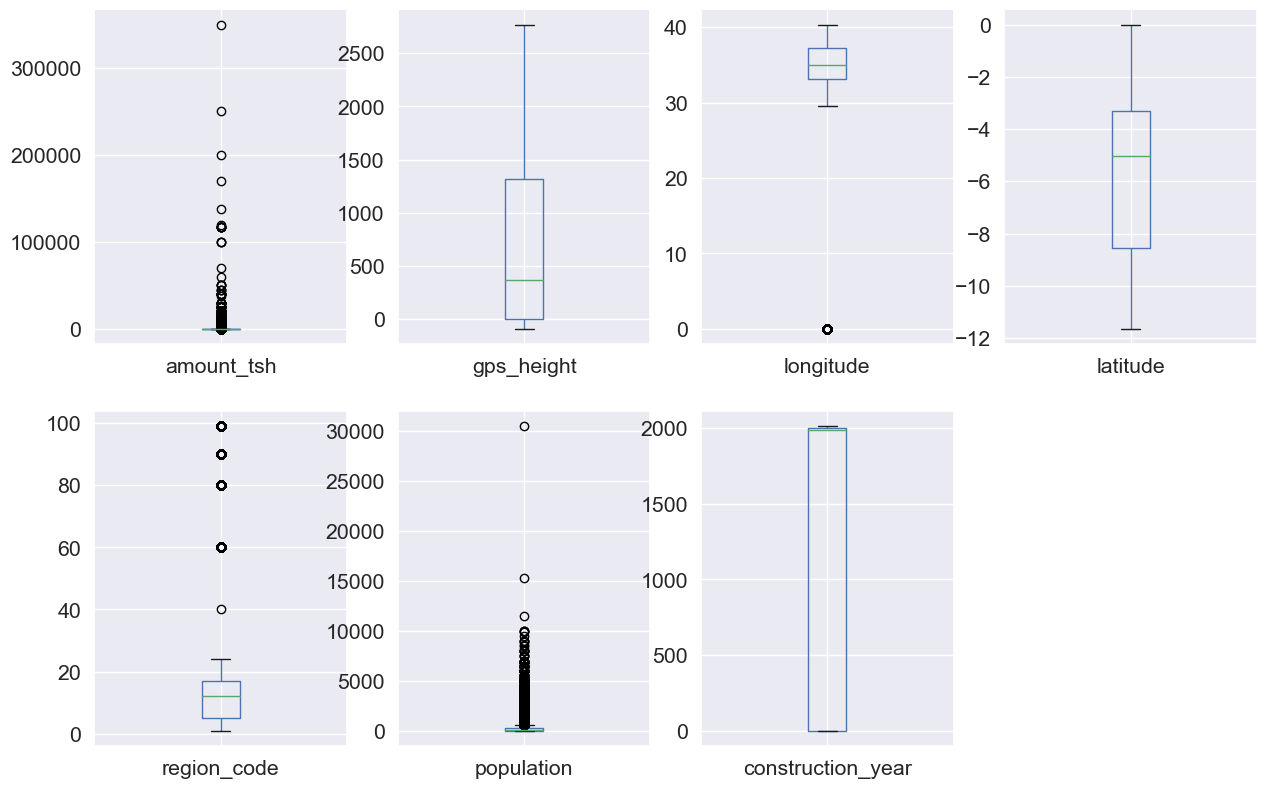

In [914]:
df.plot(kind="box",subplots=True,layout=(4,4),figsize=(15,20));

#Obeservation - 
    # We see outliers for longitude, amount_tsh and population

#### Longitude

In [915]:
# checking data where longitude is less than 10
df[df['longitude'] < 10]

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,source_class,waterpoint_type
id,,,,,,,,,,,,,,,,,,,,,,,
6091,functional,0.0,10-02-2013,Dwsp,0,DWE,0.0,-2.000000e-08,Lake Victoria,17,0,NaN,WUG,False,0,swn 80,wug,unknown,unknown,unknown,shallow well,groundwater,hand pump
32376,non functional,0.0,01-08-2011,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Lake Victoria,19,0,True,VWC,True,0,submersible,vwc,unknown,unknown,dry,machine dbh,groundwater,communal standpipe multiple
72678,functional,0.0,30-01-2013,Wvt,0,WVT,0.0,-2.000000e-08,Lake Victoria,17,0,False,Parastatal,False,0,gravity,parastatal,other,soft,seasonal,rainwater harvesting,surface,communal standpipe
56725,non functional,0.0,17-01-2013,Netherlands,0,DWE,0.0,-2.000000e-08,Lake Victoria,17,0,NaN,WUG,False,0,other,wug,unknown,soft,enough,shallow well,groundwater,other
13042,functional needs repair,0.0,29-10-2012,Hesawa,0,DWE,0.0,-2.000000e-08,Lake Victoria,19,0,True,NaN,True,0,nira/tanira,vwc,never pay,soft,insufficient,shallow well,groundwater,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62177,functional needs repair,0.0,18-07-2011,Dwsp,0,DWE,0.0,-2.000000e-08,Lake Victoria,17,0,True,WUG,False,0,nira/tanira,wug,other,soft,enough,shallow well,groundwater,hand pump
3631,functional,0.0,22-01-2013,Dwsp,0,DWE,0.0,-2.000000e-08,Lake Victoria,17,0,NaN,WUG,False,0,nira/tanira,wug,unknown,soft,enough,shallow well,groundwater,hand pump
60843,functional needs repair,0.0,19-07-2011,Rwssp,0,DWE,0.0,-2.000000e-08,Lake Victoria,17,0,True,WUG,False,0,nira/tanira,wug,never pay,soft,enough,shallow well,groundwater,hand pump


In [916]:
# bad data where longitude is less than 10 , population and amount_tsh is zero
fake = df[(df['longitude'] < 10) & (df['population'] == 0) & (df['amount_tsh'] == 0)]

In [917]:
# dropping bad data
df.drop(fake.index,inplace = True)

In [918]:
df[df['longitude'] < 10]

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,source_class,waterpoint_type
id,,,,,,,,,,,,,,,,,,,,,,,


#### Amount_tsh

In [919]:
df[df['amount_tsh'] < df['amount_tsh'].quantile(0.05)]

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,source_class,waterpoint_type
id,,,,,,,,,,,,,,,,,,,,,,,


In [920]:
df[df['amount_tsh'] > df['amount_tsh'].quantile(0.95)]

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,source_class,waterpoint_type
id,,,,,,,,,,,,,,,,,,,,,,,
69572,functional,6000.0,14-03-2011,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,11,109,True,VWC,False,1999,gravity,vwc,pay annually,soft,enough,spring,groundwater,communal standpipe
16583,functional,4000.0,20-02-2011,Cefa,1955,CEFA,35.890264,-8.224399,Rufiji,11,100,True,VWC,True,2003,gravity,vwc,pay annually,soft,enough,river,surface,communal standpipe
18864,functional,4000.0,20-02-2011,Cefa,1982,CEFA,35.871413,-8.227563,Rufiji,11,70,True,VWC,True,2003,gravity,vwc,pay annually,soft,enough,spring,groundwater,communal standpipe
25182,functional,1500.0,04-04-2011,District Council,2169,DWE,34.441283,-9.189878,Rufiji,11,20,True,VWC,True,2007,gravity,vwc,pay annually,soft,enough,spring,groundwater,communal standpipe
66521,functional,2000.0,03-02-2011,Shipo,1603,Shipo,34.988871,-8.911325,Rufiji,11,40,True,VWC,False,2010,other - rope pump,vwc,pay when scheme fails,soft,enough,hand dtw,groundwater,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73019,functional,2000.0,09-03-2011,Government Of Tanzania,1977,Commu,34.338899,-9.565553,Lake Nyasa,11,0,True,VWC,False,1976,gravity,vwc,pay annually,soft,enough,spring,groundwater,communal standpipe
15233,functional,5000.0,30-01-2013,Rudep,1137,Distri,32.125024,-6.784358,Lake Rukwa,15,96,True,VWC,True,1988,india mark ii,vwc,pay annually,soft,enough,machine dbh,groundwater,hand pump
50998,functional,40000.0,03-08-2011,Government Of Tanzania,54,DWE,39.046942,-5.061494,Pangani,4,609,True,VWC,True,2005,gravity,vwc,pay monthly,soft,enough,river,surface,communal standpipe


In [921]:
print(df['amount_tsh'].max())

350000.0


In [922]:
df.loc[df['amount_tsh'] == 0]

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,source_class,waterpoint_type
id,,,,,,,,,,,,,,,,,,,,,,,
8776,functional,0.0,06-03-2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,20,280,NaN,Other,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe
67743,non functional,0.0,28-01-2013,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,90,58,True,VWC,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple
19728,functional,0.0,13-07-2011,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,18,0,True,NaN,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe
19816,non functional,0.0,01-10-2012,Dwsp,0,DWSP,33.362410,-3.766365,Internal,17,0,True,VWC,True,0,swn 80,vwc,never pay,soft,enough,machine dbh,groundwater,hand pump
54551,non functional,0.0,09-10-2012,Rwssp,0,DWE,32.620617,-4.226198,Lake Tanganyika,17,0,True,NaN,True,0,nira/tanira,wug,unknown,milky,enough,shallow well,groundwater,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40607,non functional,0.0,15-04-2011,Government Of Tanzania,0,Government,33.009440,-8.520888,Lake Rukwa,12,0,True,VWC,True,0,gravity,vwc,never pay,soft,enough,spring,groundwater,communal standpipe
48348,functional,0.0,27-10-2012,Private,0,Private,33.866852,-4.287410,Internal,14,0,False,Water authority,False,0,gravity,private operator,pay per bucket,soft,insufficient,dam,surface,other
37057,functional,0.0,11-04-2011,NaN,0,NaN,34.017087,-8.750434,Rufiji,12,0,True,VWC,False,0,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,groundwater,hand pump


#### Population

In [923]:
df[df['population'] < df['population'].quantile(0.05)]

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,source_class,waterpoint_type
id,,,,,,,,,,,,,,,,,,,,,,,


In [924]:
df[df['population'] > df['population'].quantile(0.95)]

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,source_class,waterpoint_type
id,,,,,,,,,,,,,,,,,,,,,,,
34169,functional needs repair,0.0,22-07-2011,Hesawa,1162,DWE,32.920154,-1.947868,Lake Victoria,19,1000,NaN,NaN,True,1999,other,vwc,never pay,milky,insufficient,spring,groundwater,other
12903,non functional,0.0,30-03-2011,Government Of Tanzania,406,DWE,38.580824,-4.834836,Pangani,4,900,True,VWC,False,1992,gravity,vwc,never pay,soft,dry,river,surface,communal standpipe
26419,functional,250.0,27-01-2013,Danida,1471,DANIDA,30.216730,-4.341062,Lake Tanganyika,16,950,True,Water authority,True,2007,gravity,vwc,pay monthly,soft,enough,dam,surface,communal standpipe multiple
68554,non functional,500.0,11-02-2013,Government Of Tanzania,1274,Government,30.126681,-4.236378,Lake Tanganyika,16,1430,True,Water authority,False,1978,ksb,vwc,other,soft,enough,machine dbh,groundwater,communal standpipe multiple
62341,non functional,0.0,22-01-2013,Hesawa,1191,DWE,33.356471,-2.063494,Lake Victoria,20,804,False,Parastatal,False,2000,gravity,parastatal,unknown,soft,dry,rainwater harvesting,surface,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64651,functional,0.0,04-02-2013,Mission,1972,Missio,31.664902,-7.967846,Lake Rukwa,15,900,False,Other,True,2005,gravity,other,never pay,soft,enough,river,surface,communal standpipe
29915,non functional,600.0,28-01-2013,Isf,834,DWE,29.749577,-4.899134,Lake Tanganyika,16,788,True,Parastatal,True,2009,gravity,parastatal,unknown,soft,enough,river,surface,communal standpipe multiple
44616,functional,0.0,19-01-2013,World Bank,11,World bank,39.626009,-10.057499,Ruvuma / Southern Coast,80,800,True,NaN,True,2008,nira/tanira,vwc,unknown,soft,enough,rainwater harvesting,surface,hand pump


In [925]:
print(df['population'].max())

30500


In [926]:
df.loc[df['population'] == 0]

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,source_class,waterpoint_type
id,,,,,,,,,,,,,,,,,,,,,,,
19728,functional,0.0,13-07-2011,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,18,0,True,NaN,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe
19816,non functional,0.0,01-10-2012,Dwsp,0,DWSP,33.362410,-3.766365,Internal,17,0,True,VWC,True,0,swn 80,vwc,never pay,soft,enough,machine dbh,groundwater,hand pump
54551,non functional,0.0,09-10-2012,Rwssp,0,DWE,32.620617,-4.226198,Lake Tanganyika,17,0,True,NaN,True,0,nira/tanira,wug,unknown,milky,enough,shallow well,groundwater,hand pump
53934,non functional,0.0,03-11-2012,Wateraid,0,Water Aid,32.711100,-5.146712,Lake Tanganyika,14,0,True,VWC,True,0,india mark ii,vwc,never pay,salty,seasonal,machine dbh,groundwater,hand pump
46144,functional,0.0,03-08-2011,Isingiro Ho,0,Artisan,30.626991,-1.257051,Lake Victoria,18,0,True,NaN,True,0,nira/tanira,vwc,never pay,soft,enough,shallow well,groundwater,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72148,non functional,0.0,10-07-2011,Concern,0,CONCERN,30.667805,-2.483710,Lake Victoria,18,0,True,VWC,False,0,gravity,vwc,never pay,soft,insufficient,spring,groundwater,communal standpipe
40607,non functional,0.0,15-04-2011,Government Of Tanzania,0,Government,33.009440,-8.520888,Lake Rukwa,12,0,True,VWC,True,0,gravity,vwc,never pay,soft,enough,spring,groundwater,communal standpipe
48348,functional,0.0,27-10-2012,Private,0,Private,33.866852,-4.287410,Internal,14,0,False,Water authority,False,0,gravity,private operator,pay per bucket,soft,insufficient,dam,surface,other


In [927]:
# As there are 39826 rows with amount_tsh zero and 19569 rows with population zero dropping them
df.drop(labels=['amount_tsh','population'],inplace = True, axis = 1)

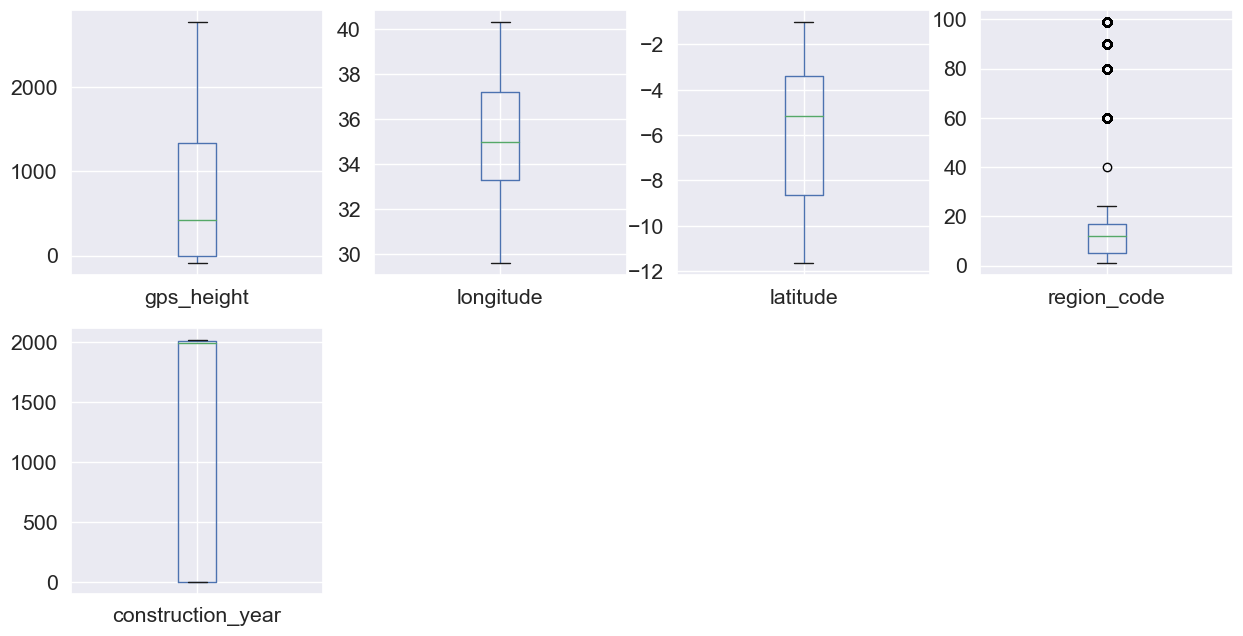

In [928]:
df.plot(kind="box",subplots=True,layout=(5,4),figsize=(15,20));

### Dealing with missing data

In [929]:
# checking null values in all columns
df.apply(lambda x: sum(x.isnull()))

status_group            0
date_recorded           0
funder               3622
gps_height              0
installer            3636
longitude               0
latitude                0
basin                   0
region_code             0
public_meeting       2976
scheme_management    3750
permit               3056
construction_year       0
extraction_type         0
management              0
payment                 0
water_quality           0
quantity                0
source                  0
source_class            0
waterpoint_type         0
dtype: int64

In [930]:
#cheking the value for funder
df['funder'].value_counts()

Government Of Tanzania            8842
Danida                            3114
Hesawa                            1914
World Bank                        1345
Kkkt                              1287
                                  ... 
Machibya Guma                        1
Padri Matayo                         1
Rotary Club Of Chico And Moshi       1
Twig                                 1
Tgz                                  1
Name: funder, Length: 1858, dtype: int64

In [931]:
# replacing null value with majority value of funder
df["funder"].replace(np.nan, "Government Of Tanzania", inplace=True)

In [932]:
#cheking the value for installer
df['installer'].value_counts()

DWE           16255
Government     1670
RWE            1181
Commu          1060
DANIDA         1050
              ...  
WOYEGE            1
AQUA Wel          1
Taes              1
VICF              1
Msagin            1
Name: installer, Length: 2113, dtype: int64

In [933]:
# replacing null value with majority value of installer
df["installer"].replace(np.nan, "DWE", inplace=True)

In [934]:
#cheking the value for public_meeting
df['public_meeting'].value_counts()

True     49736
False     4875
Name: public_meeting, dtype: int64

In [935]:
# replacing null value with majority value of public_meeting
df["public_meeting"].replace(np.nan, "True", inplace=True)

In [936]:
#cheking the value for scheme_management
df['scheme_management'].value_counts()

VWC                 36142
WUG                  4249
Water authority      3151
WUA                  2882
Water Board          2747
Parastatal           1607
Private operator     1063
Company              1061
Other                 765
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [937]:
# replacing null value with majority value of scheme_management
df["scheme_management"].replace(np.nan, "VWC", inplace=True)

In [938]:
#cheking the value for permit
df['permit'].value_counts()

True     38099
False    16432
Name: permit, dtype: int64

In [939]:
# replacing null value with majority value of permit
df["permit"].replace(np.nan, "True", inplace=True)

In [940]:
# No null data
df.apply(lambda x: sum(x.isnull()))

status_group         0
date_recorded        0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
basin                0
region_code          0
public_meeting       0
scheme_management    0
permit               0
construction_year    0
extraction_type      0
management           0
payment              0
water_quality        0
quantity             0
source               0
source_class         0
waterpoint_type      0
dtype: int64

In [941]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57587 entries, 69572 to 26348
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status_group       57587 non-null  object 
 1   date_recorded      57587 non-null  object 
 2   funder             57587 non-null  object 
 3   gps_height         57587 non-null  int64  
 4   installer          57587 non-null  object 
 5   longitude          57587 non-null  float64
 6   latitude           57587 non-null  float64
 7   basin              57587 non-null  object 
 8   region_code        57587 non-null  int64  
 9   public_meeting     57587 non-null  object 
 10  scheme_management  57587 non-null  object 
 11  permit             57587 non-null  object 
 12  construction_year  57587 non-null  int64  
 13  extraction_type    57587 non-null  object 
 14  management         57587 non-null  object 
 15  payment            57587 non-null  object 
 16  water_quality     

In [942]:
#changing public meeting and permit to boolean type
df[["public_meeting"]] = df[["public_meeting"]].astype("bool")

In [943]:
df[["permit"]] = df[["permit"]].astype("bool")

In [944]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57587 entries, 69572 to 26348
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status_group       57587 non-null  object 
 1   date_recorded      57587 non-null  object 
 2   funder             57587 non-null  object 
 3   gps_height         57587 non-null  int64  
 4   installer          57587 non-null  object 
 5   longitude          57587 non-null  float64
 6   latitude           57587 non-null  float64
 7   basin              57587 non-null  object 
 8   region_code        57587 non-null  int64  
 9   public_meeting     57587 non-null  bool   
 10  scheme_management  57587 non-null  object 
 11  permit             57587 non-null  bool   
 12  construction_year  57587 non-null  int64  
 13  extraction_type    57587 non-null  object 
 14  management         57587 non-null  object 
 15  payment            57587 non-null  object 
 16  water_quality     

## Feature Engineering 

In [945]:
# converting date recorded column to datetime 
df.date_recorded = pd.to_datetime(df.date_recorded)
df.date_recorded.describe()

C:\Anaconda\envs\mle_tf\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until


count                   57587
unique                    353
top       2011-03-15 00:00:00
freq                      572
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [946]:
# The most recent data is 2013-12-03. Subtracting each date from this point to obtain a 'days_since_recorded' column.

df.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(df.date_recorded)
df.columns = ['days_since_recorded' if x=='date_recorded' else x for x in df.columns]
df.days_since_recorded = df.days_since_recorded.astype('timedelta64[D]').astype(int)
df.days_since_recorded.describe()

C:\Anaconda\envs\mle_tf\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


count    57587.000000
mean       607.881466
std        336.881837
min          0.000000
25%        287.000000
50%        572.000000
75%        964.000000
max       4068.000000
Name: days_since_recorded, dtype: float64

In [947]:
df['funder'].value_counts()

Government Of Tanzania            12464
Danida                             3114
Hesawa                             1914
World Bank                         1345
Kkkt                               1287
                                  ...  
Machibya Guma                         1
Padri Matayo                          1
Rotary Club Of Chico And Moshi        1
Twig                                  1
Tgz                                   1
Name: funder, Length: 1858, dtype: int64

In [948]:
# Creating a function to reduce the number of unique columns  
# Keeping top 5 values and the rest are to 'other'
def funder_bin(row):  
    if row['funder']=='Government Of Tanzania':
        return 'gov'
    elif row['funder']=='Danida':
        return 'danida'
    elif row['funder']=='Hesawa':
        return 'hesawa'
    elif row['funder']=='Rwssp':
        return 'rwssp'
    elif row['funder']=='World Bank':
        return 'world_bank'    
    else:
        return 'other'
    
df['funder'] = df.apply(lambda row: funder_bin(row), axis=1)

In [949]:
df['funder'].value_counts()

other         37563
gov           12464
danida         3114
hesawa         1914
world_bank     1345
rwssp          1187
Name: funder, dtype: int64

In [950]:
df['installer'].value_counts()

DWE           19891
Government     1670
RWE            1181
Commu          1060
DANIDA         1050
              ...  
WOYEGE            1
AQUA Wel          1
Taes              1
VICF              1
Msagin            1
Name: installer, Length: 2113, dtype: int64

In [951]:
# Creating a function to reduce the number of unique columns  
# Keeping top 5 values and the rest are to 'other'

def installer_bin(row):
    if row['installer']=='DWE':
        return 'dwe'
    elif row['installer']=='Government':
        return 'gov'
    elif row['installer']=='RWE':
        return 'rwe'
    elif row['installer']=='Commu':
        return 'commu'
    elif row['installer']=='DANIDA':
        return 'danida'
    else:
        return 'other'  

df['installer'] = df.apply(lambda row: installer_bin(row), axis=1)

In [952]:
df['installer'].value_counts()

other     32735
dwe       19891
gov        1670
rwe        1181
commu      1060
danida     1050
Name: installer, dtype: int64

In [953]:
df['scheme_management'].value_counts()

VWC                 39892
WUG                  4249
Water authority      3151
WUA                  2882
Water Board          2747
Parastatal           1607
Private operator     1063
Company              1061
Other                 765
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [954]:
# Creating a function to reduce the number of unique columns  
# Keeping top 5 values and the rest are to 'other'
def scheme_dum(row):
    if row['scheme_management']=='VWC':
        return 'vwc'
    elif row['scheme_management']=='WUG':
        return 'wug'
    elif row['scheme_management']=='Water authority':
        return 'wtr_auth'
    elif row['scheme_management']=='WUA':
        return 'wua'
    elif row['scheme_management']=='Water Board':
        return 'wtr_brd'
    else:
        return 'other'

df['scheme_management'] = df.apply(lambda row: scheme_dum(row), axis=1)

In [955]:
df['scheme_management'].value_counts()

vwc         39892
other        4666
wug          4249
wtr_auth     3151
wua          2882
wtr_brd      2747
Name: scheme_management, dtype: int64

### Checking for multicolinearity

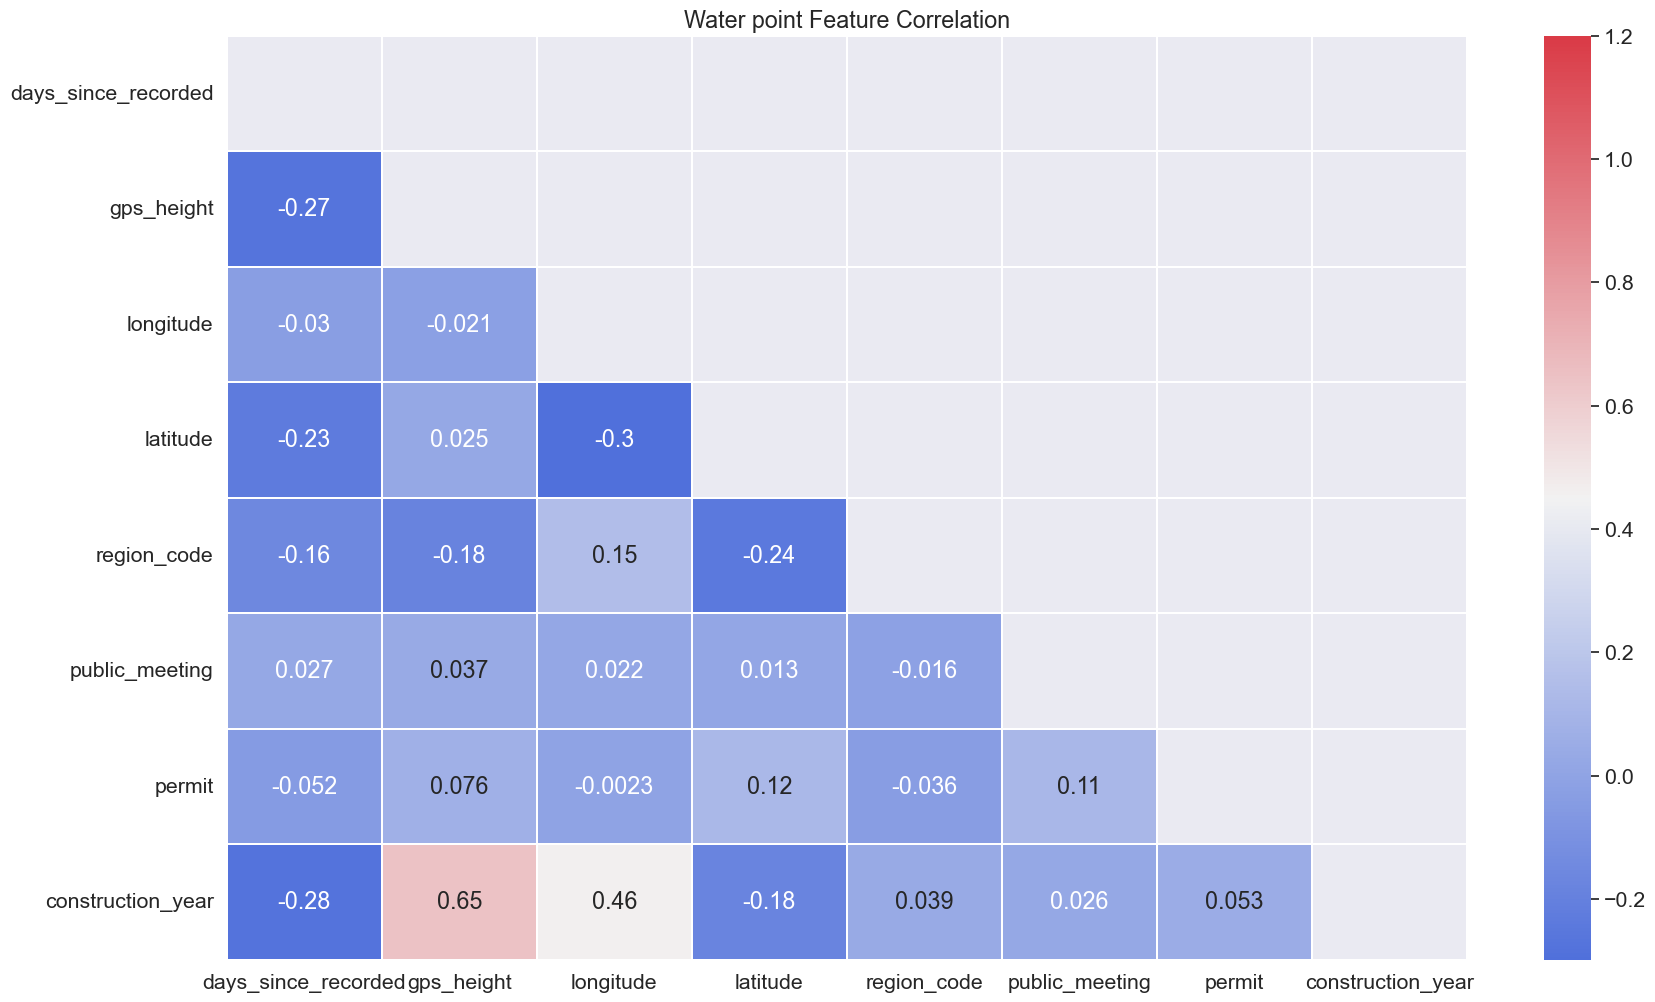

In [956]:
# checking correlation of continuous features
corrMatt = df.corr()
# Generating a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Setting up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Water point Feature Correlation')
# Generating a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask,
ax=ax, annot=True, fmt='.2g', linewidths=1);

### No strong correlation between features hence no high multicolinearity. 

### Label Encoding 

In [957]:
from sklearn.preprocessing import LabelEncoder

# Separate boolean and string columns
bool_cols = df.select_dtypes(include=bool).columns.tolist()
str_cols = df.select_dtypes(include='object').columns.tolist()

# Encode boolean columns
df[bool_cols] = df[bool_cols].astype(int)

# Encode string columns
label_encoder = LabelEncoder()
for col in str_cols:
    df[col] = label_encoder.fit_transform(df[col])
    
print(df)

       status_group  days_since_recorded  funder  gps_height  installer  \
id                                                                        
69572             0                  995       3        1390          4   
8776              0                  183       3        1399          4   
34310             0                  281       3         686          4   
67743             2                  309       3         263          4   
19728             0                  874       3           0          4   
...             ...                  ...     ...         ...        ...   
60739             0                  273       3        1210          4   
27263             0                  882       3        1212          4   
37057             0                  760       1           0          2   
31282             0                  853       3           0          4   
26348             0                  986       5         191          4   

       longitude   latit

In [958]:
df.head()

,status_group,days_since_recorded,funder,gps_height,installer,longitude,latitude,basin,region_code,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,source_class,waterpoint_type
id,,,,,,,,,,,,,,,,,,,,,
69572,0,995,3,1390,4,34.938093,-9.856322,1,11,1,1,0,1999,3,7,2,6,1,8,0,1
8776,0,183,3,1399,4,34.698766,-2.147466,4,20,1,0,1,2010,3,11,0,6,2,5,1,1
34310,0,281,3,686,4,37.460664,-3.821329,5,21,1,1,1,2009,3,7,4,6,1,0,1,2
67743,2,309,3,263,4,38.486161,-11.155298,7,90,1,1,1,1986,14,7,0,6,0,3,0,2
19728,0,874,3,0,4,31.130847,-1.825359,4,18,1,1,1,0,3,1,0,6,3,5,1,1


### Feature Selection using Filter based methods - Chi square for categorical feature and categorical outcome

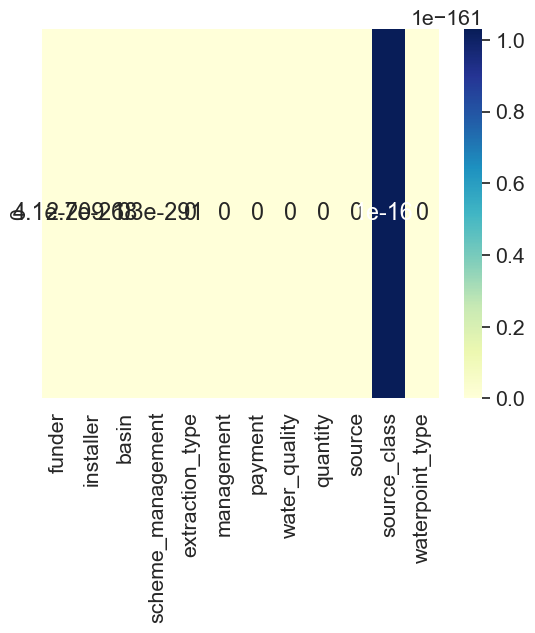

In [959]:
import scipy.stats as stats

predictors = df[['funder','installer','basin','scheme_management'
                ,'extraction_type','management','payment','water_quality',
                        'quantity','source','source_class','waterpoint_type']]
outcome = df['status_group']
                    
# Perform chi-square tests for independence between each predictor and the outcome
p_values = []
for column in predictors.columns:
    observed = pd.crosstab(predictors[column], outcome)
    chi2, p_value, _, _ = stats.chi2_contingency(observed)
    p_values.append(p_value)

# Reshape the p-values into a square matrix
p_value_matrix = pd.DataFrame([p_values], columns=predictors.columns)

# Visualize the p-values as a heatmap
sns.heatmap(p_value_matrix, annot=True, cmap='YlGnBu')

### Feature Selection using Filter based methods - ANOVA for Continuous feature and categorical outcome

In [960]:
import pandas as pd
import scipy.stats as stats


# Separate the numerical predictors and outcome
predictors = df[['days_since_recorded','gps_height','longitude',\
                 'latitude','construction_year','permit','public_meeting','region_code']]
outcome = df['status_group']

# Perform ANOVA test for each predictor
anova_results = {}
for col in predictors.columns:
    f_value, p_value = stats.f_oneway(predictors[col], outcome)
    anova_results[col] = {'F-value': f_value, 'p-value': p_value}

# Print ANOVA results
for col, result in anova_results.items():
    print("Predictor:", col)
    print("F-value:", result['F-value'])
    print("p-value:", result['p-value'])
    print()


Predictor: days_since_recorded
F-value: 186982.160447154
p-value: 0.0

Predictor: gps_height
F-value: 56748.241175150884
p-value: 0.0

Predictor: longitude
F-value: 8796922.02936718
p-value: 0.0

Predictor: latitude
F-value: 296090.90272537793
p-value: 0.0

Predictor: construction_year
F-value: 117749.70926568902
p-value: 0.0

Predictor: permit
F-value: 835.9701814868109
p-value: 3.7060842509490104e-183

Predictor: public_meeting
F-value: 317.9538662398079
p-value: 5.038756374106501e-71

Predictor: region_code
F-value: 37224.07705342018
p-value: 0.0



### Seems all are significant features from ANOVA and Chi square

## Modelling using Random Forest

In [963]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

# Split data into features and labels
X = df.drop('status_group', axis=1)
y = df['status_group']

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicting the labels for the testing set
y_pred = clf.predict(X_test)

# Evaluating the accuracy of the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.805
Precision: 0.7144944326119069
Recall: 0.6673523901356421
F1 score: 0.6851611006204715


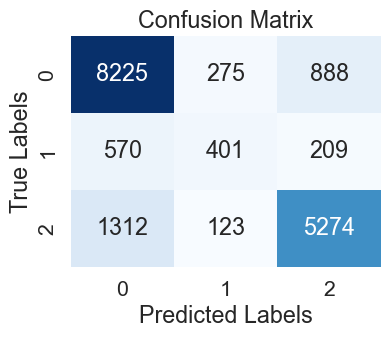

In [964]:
rm = confusion_matrix(y_test,y_pred)
# Create a figure and axis
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.4)  # Adjust the font scale for better readability

# Plotting the confusion matrix using a heatmap
sns.heatmap(rm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Setting axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Displaying the plot
plt.show()

In [965]:
importances = clf.feature_importances_
df_fi  = pd.DataFrame(zip(importances,list(df.drop('status_group', axis=1).columns)), columns=["importance","feature_name"])
df_fi = df_fi.sort_values(by="importance", ascending=False)
df_fi.head()

,importance,feature_name
4,0.156872,longitude
5,0.151821,latitude
16,0.134843,quantity
2,0.085778,gps_height
0,0.079643,days_since_recorded


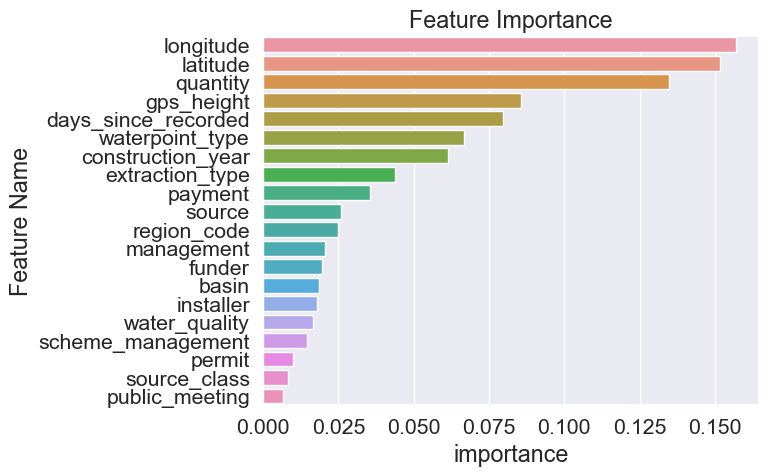

In [966]:
# plt.figure(figsize=(10,5))
sns.barplot(y="feature_name",x="importance", data=df_fi,)
#plt.xticks(rotation=90)
plt.ylabel("Feature Name" )
plt.title("Feature Importance")
plt.show()

## Random forest with grid search 

In [967]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# df.data= df.drop('status_group',axis=1)
# df.target = df['status_group']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [968]:
### Cross-checking the sizes of the arrays before feeding it into the model
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40310, 20)
(40310,)
(17277, 20)
(17277,)


In [969]:
# Train a Random Forest model
clf = RandomForestClassifier(random_state=42)
param_grid = { 
    'max_depth' : [16, 20, 25],
    'n_estimators' : [256, 300, 500],
    'min_samples_split': [1, 2, 4],
    'min_samples_leaf': [3, 4, 5]
}

# Build the grid search
dfrst = RandomForestClassifier()
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(X_train, y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

C:\Anaconda\envs\mle_tf\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\envs\mle_tf\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\envs\mle_tf\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "C:\Anaconda\envs\mle_tf\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\envs\mle_tf\lib\site-pa

Best: [       nan        nan        nan 0.79603076 0.79595634 0.79620442
 0.79578268 0.79612999 0.79605557        nan        nan        nan
 0.79461672 0.79345076 0.79444307 0.7938973  0.79466634 0.79419499
        nan        nan        nan 0.79248325 0.79258249 0.79188787
 0.79213595 0.7919871  0.79221037        nan        nan        nan
 0.80104193 0.80220789 0.80270404 0.80230712 0.80230712 0.80238154
        nan        nan        nan 0.79920615 0.79965269 0.80022327
 0.80007442 0.79995038 0.80062019        nan        nan        nan
 0.79786653 0.7974448  0.79794096 0.79771769 0.79732076 0.79796577
        nan        nan        nan 0.80200943 0.80317539 0.80369635
 0.80362193 0.80228231 0.80270404        nan        nan        nan
 0.80094269 0.80027289 0.80124039 0.80062019 0.80076904 0.80099231
        nan        nan        nan 0.79863557 0.79875961 0.79950385
 0.79851154 0.79861077 0.79880923], using {'max_depth': 25, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.087480,0.006990,0.000000,0.000000,16,3,1,256,"{'max_depth': 16, 'min_samples_leaf': 3, 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,81
1,0.120855,0.010642,0.000000,0.000000,16,3,1,300,"{'max_depth': 16, 'min_samples_leaf': 3, 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,57
2,0.169748,0.016077,0.000000,0.000000,16,3,1,500,"{'max_depth': 16, 'min_samples_leaf': 3, 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
3,11.053230,0.844778,0.518744,0.036453,16,3,2,256,"{'max_depth': 16, 'min_samples_leaf': 3, 'min_...",0.794716,0.790251,0.793724,0.801786,0.799677,0.796031,0.004169,40
4,12.573072,0.914689,0.595419,0.042329,16,3,2,300,"{'max_depth': 16, 'min_samples_leaf': 3, 'min_...",0.793972,0.792359,0.793227,0.799553,0.800670,0.795956,0.003449,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,20.909064,0.464194,0.953878,0.098692,25,5,2,300,"{'max_depth': 25, 'min_samples_leaf': 5, 'min_...",0.796204,0.794220,0.795336,0.803523,0.804515,0.798760,0.004351,27
77,35.281855,0.661216,1.637659,0.135179,25,5,2,500,"{'max_depth': 25, 'min_samples_leaf': 5, 'min_...",0.796204,0.793972,0.798065,0.805135,0.804143,0.799504,0.004400,24
78,18.269915,0.372108,0.853750,0.028617,25,5,4,256,"{'max_depth': 25, 'min_samples_leaf': 5, 'min_...",0.795460,0.794344,0.795956,0.803151,0.803647,0.798512,0.004027,30
79,20.961663,0.587648,0.944810,0.096820,25,5,4,300,"{'max_depth': 25, 'min_samples_leaf': 5, 'min_...",0.795584,0.792359,0.796204,0.805259,0.803647,0.798611,0.004972,29


In [299]:
# Accuracy for RM grid search
grid.best_score_

0.8032994294219797

In [300]:
#Seeing the Best Parameters 
grid.best_params_

{'max_depth': 25,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

## Artificial neural network (multi-layer perceptron - MLP) for classification 

In [410]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [411]:
# checking rows and columns
y_train = np.expand_dims(y_train,axis = -1)
y_train.shape

(40310, 1)

In [412]:
y_test = np.expand_dims(y_test,axis = -1)
y_test.shape

(17277, 1)

In [413]:
import tensorflow as tf
import tensorflow.tools as tsl
from tensorflow.keras.layers import Dense,Activation,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.metrics import Accuracy

In [414]:
### Cross-checking the sizes of the arrays before feeding it into the model
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40310, 20)
(40310, 1)
(17277, 20)
(17277, 1)


In [427]:
### Model architecture
model = Sequential([
    Dense(units = 40, input_shape = (20,), activation = 'relu'),
    Dense(units = 80, activation = 'relu'),
    Dense(units = 160, activation = 'relu'),
    Dense(units = 320, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 640, activation = 'relu'),
    Dense(units = 640, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 320, activation = 'relu'),
    Dense(units = 160, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 80, activation = 'relu'),
    Dense(units = 40, activation = 'relu'),
    Dense(units = 3, activation = 'softmax')
])
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_205 (Dense)            (None, 40)                840       
_________________________________________________________________
dense_206 (Dense)            (None, 80)                3280      
_________________________________________________________________
dense_207 (Dense)            (None, 160)               12960     
_________________________________________________________________
dense_208 (Dense)            (None, 320)               51520     
_________________________________________________________________
dropout_21 (Dropout)         (None, 320)               0         
_________________________________________________________________
dense_209 (Dense)            (None, 640)               205440    
_________________________________________________________________
dense_210 (Dense)            (None, 640)             

In [428]:
### Compiling the model and keeping a track of the losses.
model.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])
history = model.fit(x=X_train,y=y_train,epochs=200,verbose=2,validation_split=0.2,batch_size=512)

Train on 32248 samples, validate on 8062 samples
Epoch 1/200
32248/32248 - 2s - loss: 0.8230 - acc: 0.6045 - val_loss: 0.7436 - val_acc: 0.6765
Epoch 2/200
32248/32248 - 2s - loss: 0.6947 - acc: 0.7035 - val_loss: 0.6688 - val_acc: 0.7285
Epoch 3/200
32248/32248 - 2s - loss: 0.6475 - acc: 0.7287 - val_loss: 0.6453 - val_acc: 0.7311
Epoch 4/200
32248/32248 - 2s - loss: 0.6234 - acc: 0.7369 - val_loss: 0.6248 - val_acc: 0.7453
Epoch 5/200
32248/32248 - 2s - loss: 0.6003 - acc: 0.7512 - val_loss: 0.6063 - val_acc: 0.7539
Epoch 6/200
32248/32248 - 2s - loss: 0.5897 - acc: 0.7558 - val_loss: 0.6063 - val_acc: 0.7498
Epoch 7/200
32248/32248 - 2s - loss: 0.5714 - acc: 0.7639 - val_loss: 0.5982 - val_acc: 0.7575
Epoch 8/200
32248/32248 - 2s - loss: 0.5576 - acc: 0.7691 - val_loss: 0.6008 - val_acc: 0.7537
Epoch 9/200
32248/32248 - 2s - loss: 0.5471 - acc: 0.7741 - val_loss: 0.5892 - val_acc: 0.7602
Epoch 10/200
32248/32248 - 2s - loss: 0.5360 - acc: 0.7770 - val_loss: 0.5888 - val_acc: 0.7628


Epoch 86/200
32248/32248 - 3s - loss: 0.3371 - acc: 0.8532 - val_loss: 0.8536 - val_acc: 0.7652
Epoch 87/200
32248/32248 - 3s - loss: 0.3328 - acc: 0.8548 - val_loss: 0.8673 - val_acc: 0.7750
Epoch 88/200
32248/32248 - 3s - loss: 0.3333 - acc: 0.8526 - val_loss: 0.8706 - val_acc: 0.7676
Epoch 89/200
32248/32248 - 3s - loss: 0.3339 - acc: 0.8557 - val_loss: 0.8769 - val_acc: 0.7698
Epoch 90/200
32248/32248 - 3s - loss: 0.3345 - acc: 0.8553 - val_loss: 0.8621 - val_acc: 0.7682
Epoch 91/200
32248/32248 - 3s - loss: 0.3333 - acc: 0.8549 - val_loss: 0.9031 - val_acc: 0.7683
Epoch 92/200
32248/32248 - 4s - loss: 0.3346 - acc: 0.8554 - val_loss: 0.9115 - val_acc: 0.7699
Epoch 93/200
32248/32248 - 3s - loss: 0.3321 - acc: 0.8554 - val_loss: 0.9080 - val_acc: 0.7718
Epoch 94/200
32248/32248 - 3s - loss: 0.3331 - acc: 0.8544 - val_loss: 0.8709 - val_acc: 0.7741
Epoch 95/200
32248/32248 - 3s - loss: 0.3318 - acc: 0.8551 - val_loss: 0.8506 - val_acc: 0.7747
Epoch 96/200
32248/32248 - 3s - loss: 0.

Epoch 171/200
32248/32248 - 3s - loss: 0.3017 - acc: 0.8663 - val_loss: 1.0728 - val_acc: 0.7702
Epoch 172/200
32248/32248 - 3s - loss: 0.3049 - acc: 0.8671 - val_loss: 0.9529 - val_acc: 0.7698
Epoch 173/200
32248/32248 - 3s - loss: 0.2986 - acc: 0.8683 - val_loss: 1.1079 - val_acc: 0.7697
Epoch 174/200
32248/32248 - 3s - loss: 0.2994 - acc: 0.8669 - val_loss: 1.0952 - val_acc: 0.7705
Epoch 175/200
32248/32248 - 3s - loss: 0.3050 - acc: 0.8665 - val_loss: 1.0168 - val_acc: 0.7661
Epoch 176/200
32248/32248 - 3s - loss: 0.3029 - acc: 0.8662 - val_loss: 0.9492 - val_acc: 0.7698
Epoch 177/200
32248/32248 - 3s - loss: 0.3011 - acc: 0.8683 - val_loss: 0.9994 - val_acc: 0.7720
Epoch 178/200
32248/32248 - 3s - loss: 0.2985 - acc: 0.8689 - val_loss: 1.0290 - val_acc: 0.7677
Epoch 179/200
32248/32248 - 3s - loss: 0.3037 - acc: 0.8668 - val_loss: 1.0625 - val_acc: 0.7729
Epoch 180/200
32248/32248 - 3s - loss: 0.3009 - acc: 0.8663 - val_loss: 1.0234 - val_acc: 0.7705
Epoch 181/200
32248/32248 - 3s

In [429]:
### Evaluating and predicting the test dataset.
model.evaluate(x=X_test,y=y_test)
y_pred = model.predict(X_test)
y_final = np.argmax(y_pred,axis = 1)
print(y_pred)
print(y_final)

17277/17277 [==============================] - 2s 116us/sample - loss: 1.1023 - acc: 0.7623
[[1.1774879e-04 7.5963279e-03 9.9228597e-01]
 [5.1598221e-01 3.3192817e-05 4.8398450e-01]
 [3.5126278e-01 1.6707067e-04 6.4857018e-01]
 ...
 [8.2445240e-01 2.6649954e-02 1.4889757e-01]
 [8.2620442e-02 6.3390595e-01 2.8347364e-01]
 [3.3199079e-02 4.9030647e-02 9.1777021e-01]]
[2 0 2 ... 0 1 2]


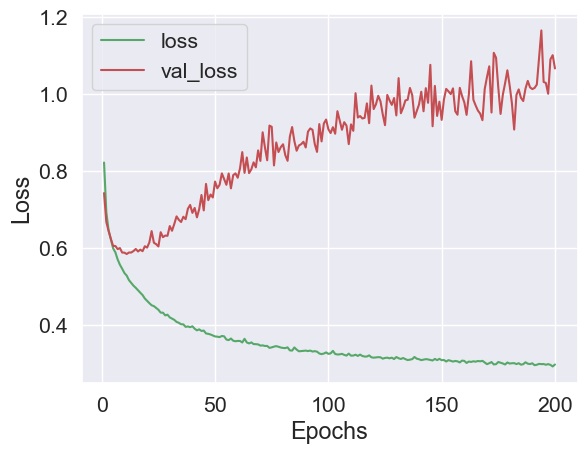

In [430]:
### Loss vs epochs to analyse the gradient descent alogorithm.
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,201)
plt.plot(epochs, loss, 'g', label='loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [419]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_final)

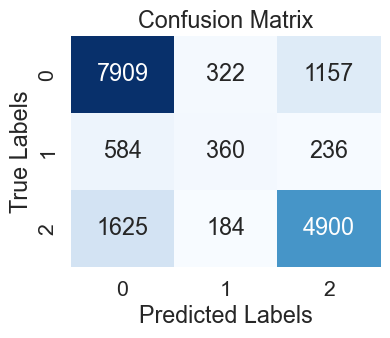

In [420]:
# Create a figure and axis
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.4)  # Adjust the font scale for better readability

# Plotting the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Setting axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Displaying the plot
plt.show()
